Regression Evaluation:
MSE: 9959.01
MAE: 79.69
RMSE: 99.79
R2 Score: 0.51
Adjusted R2 Score: 0.50

Classification Evaluation:
Accuracy: 0.90
Precision: 0.89
Recall: 0.89
F1 Score: 0.89


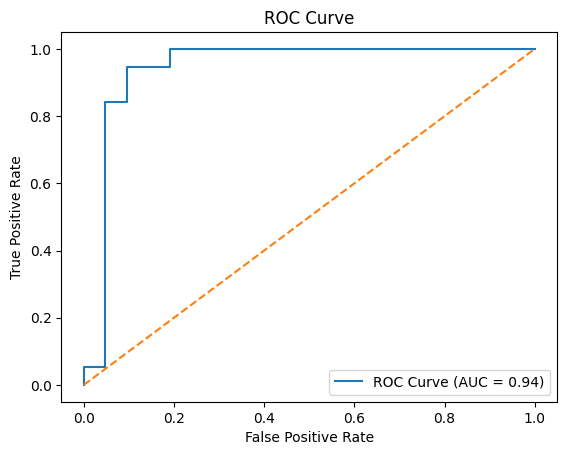


Cross-Validation (Classification Accuracy):
Scores: [0.85  0.95  0.875 0.875 0.775]
Mean CV Accuracy: 0.86


In [17]:
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc
)
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import make_regression, make_classification
import matplotlib.pyplot as plt
import numpy as np

X_reg, y_reg = make_regression(n_samples=10000, n_features=2, noise=101, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

model_reg = LinearRegression()
model_reg.fit(X_train_r, y_train_r)
y_pred_r = model_reg.predict(X_test_r)

# Regression Metrics
mse = mean_squared_error(y_test_r, y_pred_r)
mae = mean_absolute_error(y_test_r, y_pred_r)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_r, y_pred_r)
n = len(y_test_r)
p = X_test_r.shape[1]
r2_adj = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

print("Regression Evaluation:")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")
print(f"Adjusted R2 Score: {r2_adj:.2f}")

X_clf, y_clf = make_classification(n_samples=200, n_features=4, n_classes=2 , random_state=42)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

model_clf = LogisticRegression()
model_clf.fit(X_train_c, y_train_c)
y_pred_c = model_clf.predict(X_test_c)
y_prob_c = model_clf.predict_proba(X_test_c)[:, 1]


accuracy = accuracy_score(y_test_c, y_pred_c)
precision = precision_score(y_test_c, y_pred_c)
recall = recall_score(y_test_c, y_pred_c)
f1 = f1_score(y_test_c, y_pred_c)

print("\nClassification Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

fpr, tpr, _ = roc_curve(y_test_c, y_prob_c)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

cv_scores = cross_val_score(model_clf, X_clf, y_clf, cv=5, scoring='accuracy')

print("\nCross-Validation (Classification Accuracy):")
print(f"Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")
